<a href="https://colab.research.google.com/github/erinmcmahon26/School_EDA/blob/main/Housing_Prices_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ingest Data

In [286]:
import pandas as pd

In [287]:
from google.colab import files
df_train = pd.read_csv('https://raw.githubusercontent.com/erinmcmahon26/School_EDA/main/housing_prices_train_data.csv')

In [288]:
df_test = pd.read_csv('https://raw.githubusercontent.com/erinmcmahon26/School_EDA/main/housing_prices_test.csv')

In [289]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [290]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## EDA

In [291]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [292]:
pd.set_option("display.max_rows", None)

In [293]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [294]:
df_train.describe(include = "O")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [295]:
df_train.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [296]:
df_test.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [297]:
df_train.fillna(0, inplace=True)

In [298]:
df_test.fillna(0, inplace=True)

### Assessing Dependent Variable

In [299]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

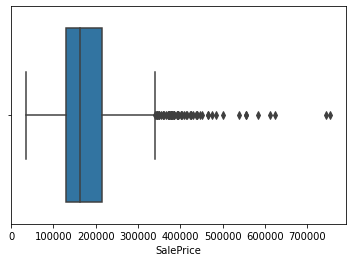

In [300]:
sns.boxplot(x='SalePrice', data=df_train)

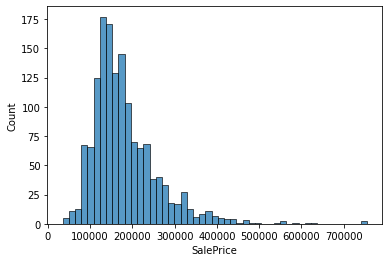

In [301]:
sns.histplot(x='SalePrice', data = df_train)

### Outlier Removal

In [302]:
# took out outliers based on boxplot outlier indications
outliers = df_train[df_train['SalePrice'] > 350000]
len(outliers)

54

In [303]:
# created new df excluding outliers
df_train2 = df_train[df_train['SalePrice'] <= 350000]

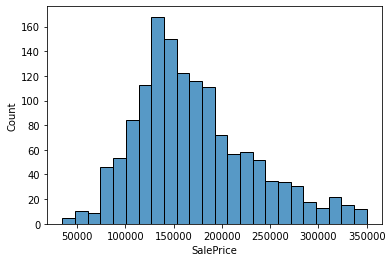

In [304]:
sns.histplot(x='SalePrice', data = df_train2)

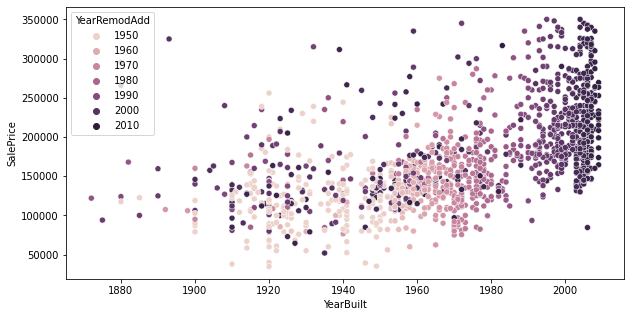

In [305]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='YearBuilt', y='SalePrice', hue='YearRemodAdd', data= df_train2)

### Search For Features

In [306]:
# combine like features 
df_train2['TotalBath'] = df_train2['BsmtFullBath'] + 0.5*(df_train2['BsmtHalfBath']) +df_train2['FullBath'] + 0.5*(df_train2['HalfBath'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [307]:
# combine like features for test
df_test['TotalBath'] = df_test['BsmtFullBath'] + 0.5*(df_test['BsmtHalfBath']) + df_test['FullBath'] + 0.5*(df_test['HalfBath'])

In [308]:
corr_matrix = df_train2.corr()
corr_matrix['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.786782
GrLivArea        0.668598
TotalBath        0.640550
GarageCars       0.633250
GarageArea       0.613226
FullBath         0.581281
YearBuilt        0.563842
TotalBsmtSF      0.546806
YearRemodAdd     0.539863
1stFlrSF         0.525214
TotRmsAbvGrd     0.481137
Fireplaces       0.455876
MasVnrArea       0.364205
2ndFlrSF         0.326451
OpenPorchSF      0.325439
WoodDeckSF       0.306803
BsmtFinSF1       0.303796
GarageYrBlt      0.302382
HalfBath         0.285982
LotArea          0.246926
BsmtUnfSF        0.213847
BsmtFullBath     0.209889
BedroomAbvGr     0.206744
LotFrontage      0.142587
ScreenPorch      0.102655
MoSold           0.074079
PoolArea         0.046710
3SsnPorch        0.040766
BsmtFinSF2       0.002779
MiscVal         -0.013894
Id              -0.016095
BsmtHalfBath    -0.021942
YrSold          -0.031760
OverallCond     -0.049012
LowQualFinSF    -0.058591
MSSubClass      -0.058979
EnclosedPorch   -0.139592
KitchenAbvGr

Text(0.5, 1.0, 'Correlation Housing Prices Features')

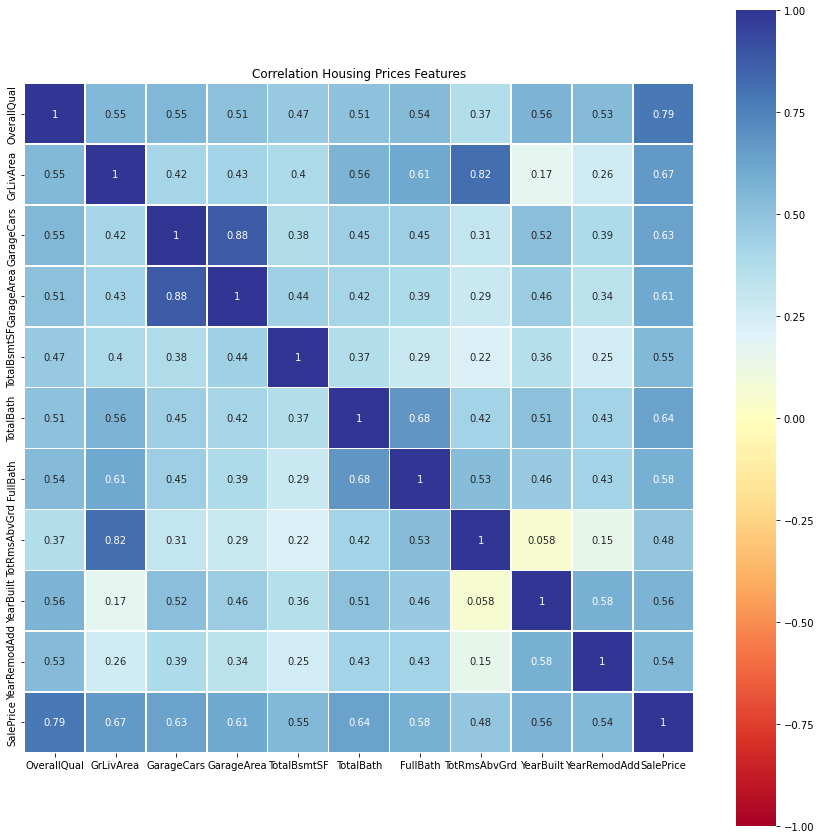

In [309]:
# pull out top 10 most correlated quantitative variables
columns = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','TotalBath','FullBath',
           'TotRmsAbvGrd','YearBuilt','YearRemodAdd', 'SalePrice']
df_train2_corr = df_train2[columns]
df_train2_corr.corr()

corrmat = df_train2_corr.corr()

f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corrmat, vmin = -1, vmax = 1, square=True, annot = True, cmap = 'RdYlBu', linewidths =.5)
plt.title('Correlation Housing Prices Features')

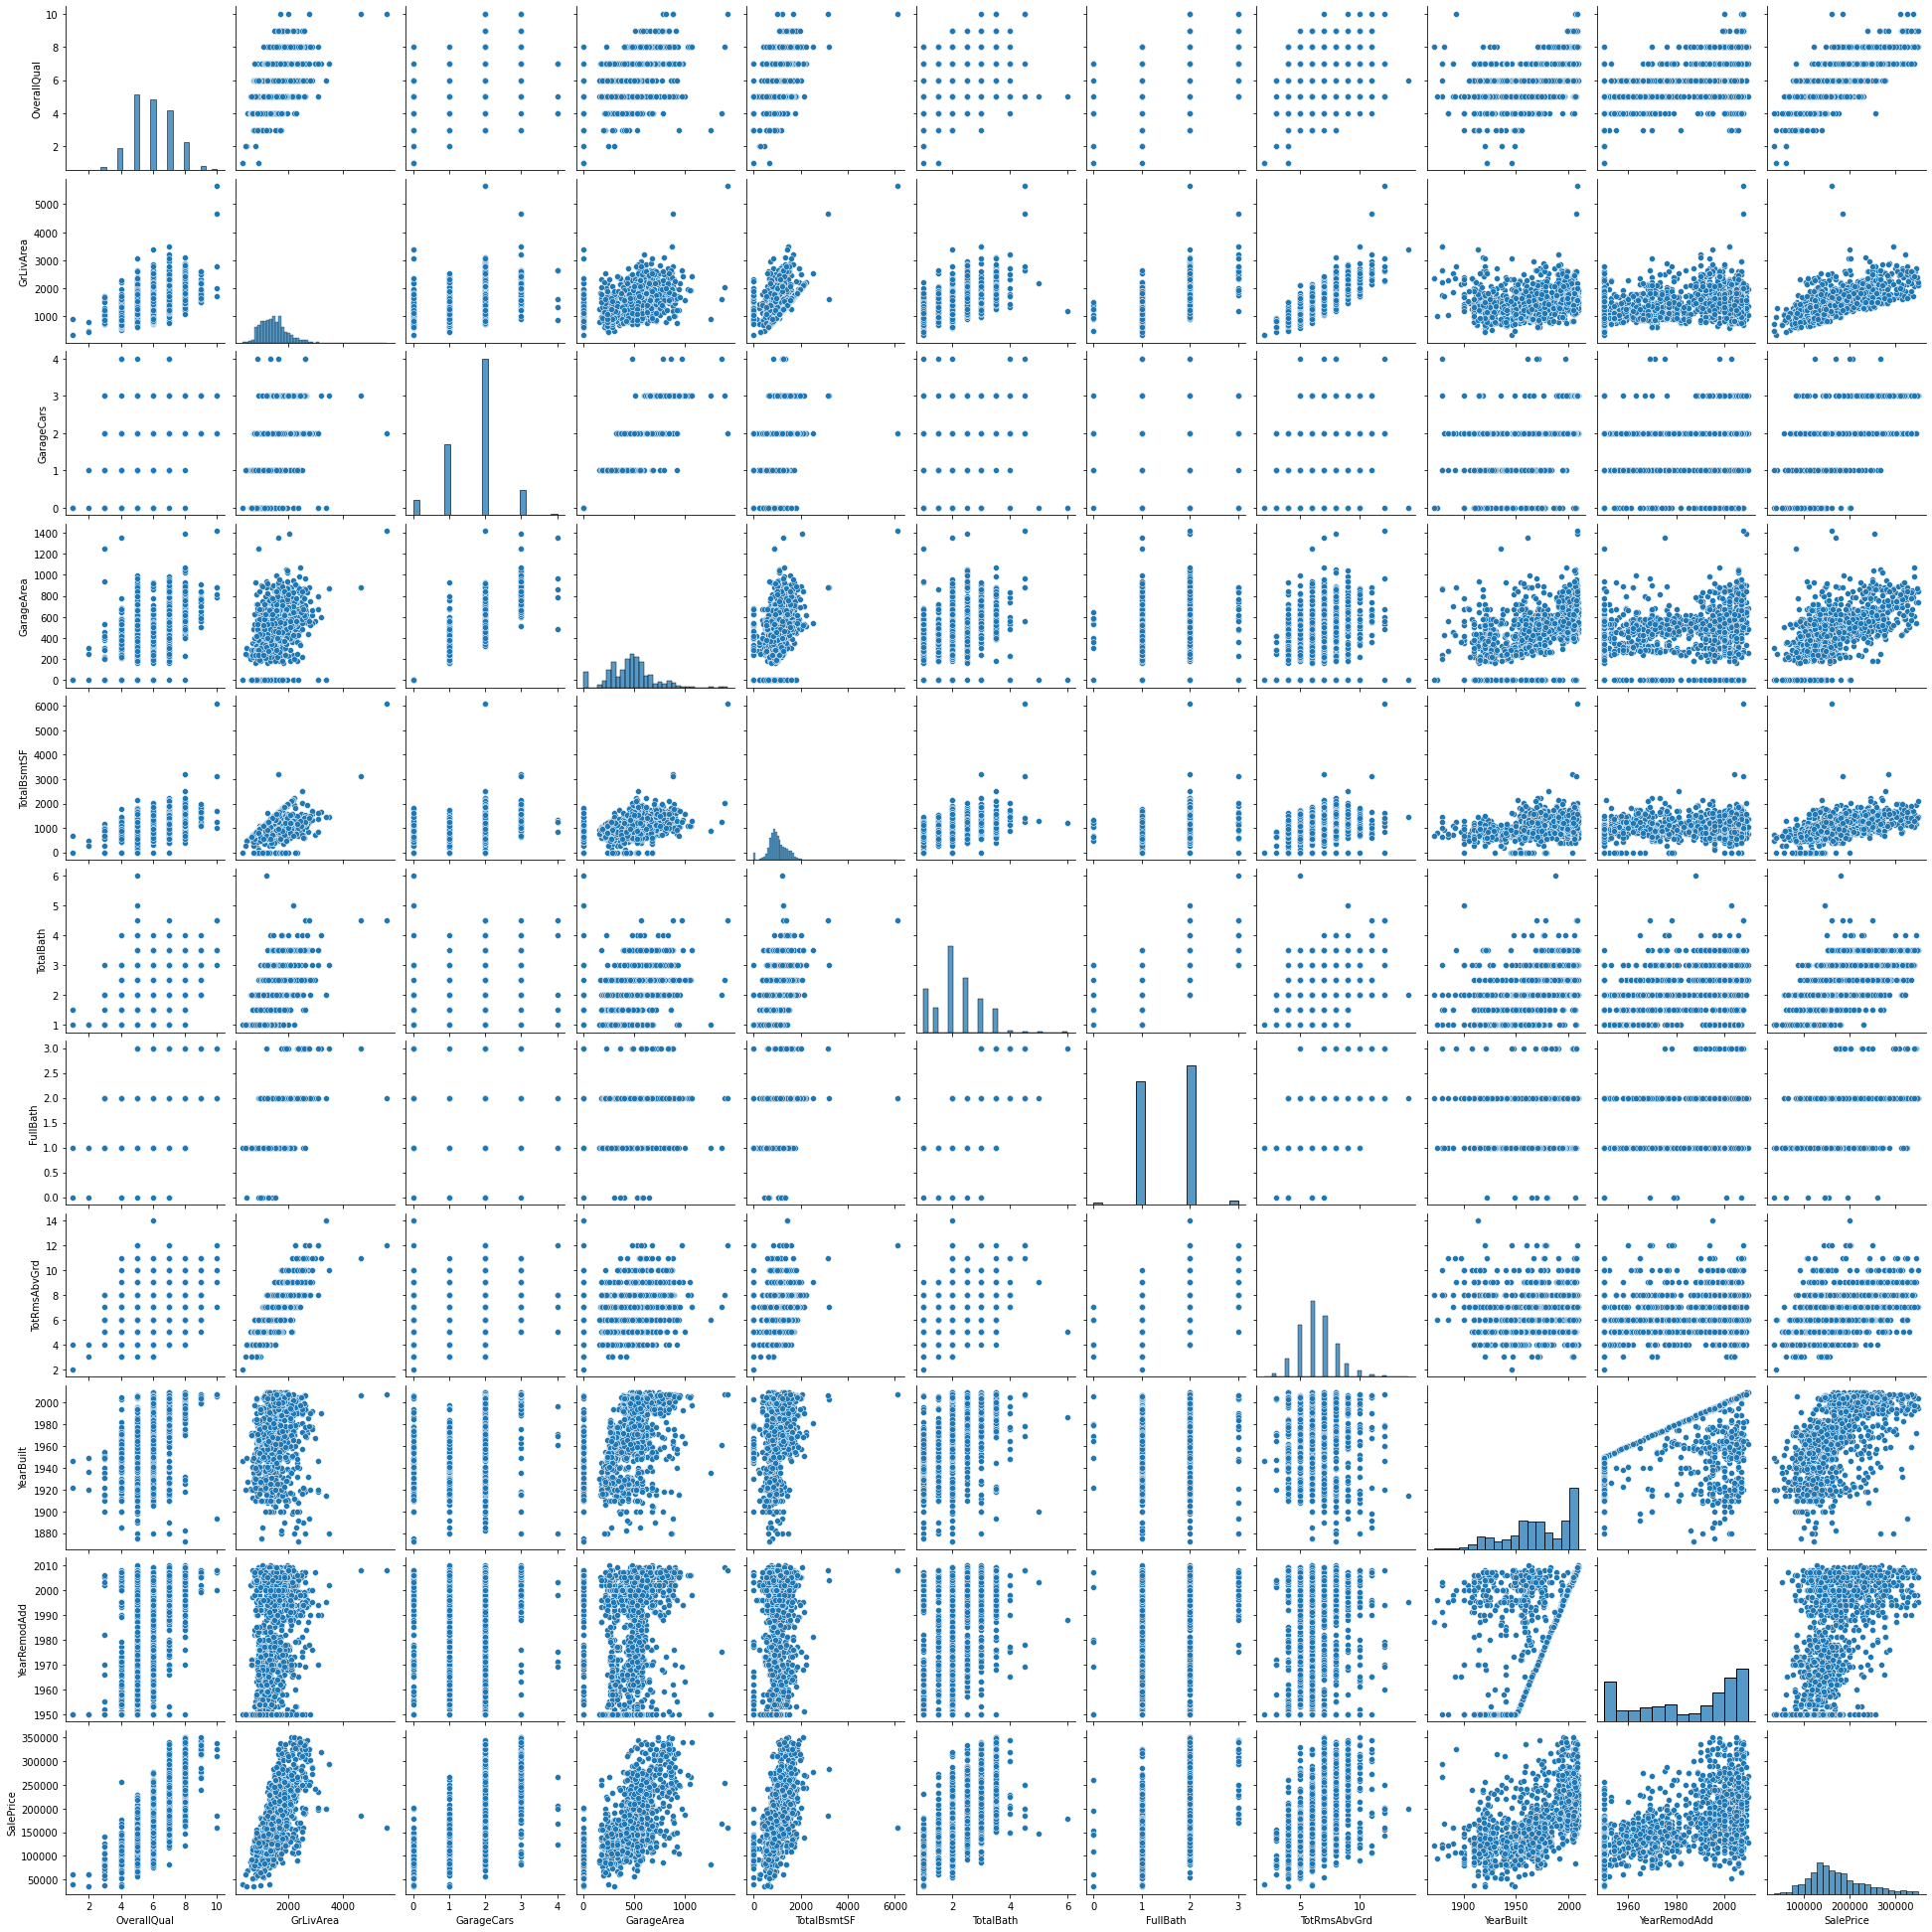

In [310]:
sns.pairplot(df_train2_corr)

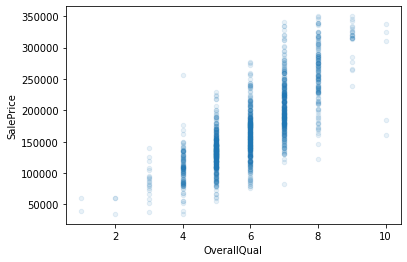

In [311]:
df_train2.plot(kind='scatter', x= 'OverallQual', y = 'SalePrice', alpha = 0.1)

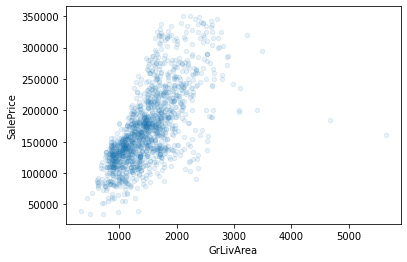

In [312]:
df_train2.plot(kind='scatter', x= 'GrLivArea', y = 'SalePrice', alpha = 0.1)

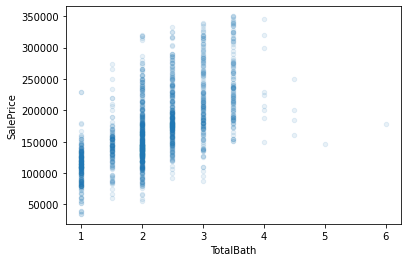

In [313]:
df_train2.plot(kind='scatter', x= 'TotalBath', y = 'SalePrice', alpha = 0.1)

In [314]:
df_train2[['SalePrice','OverallQual']].groupby('OverallQual').describe()

SalePrice                 ...                    
                count           mean  ...       75%       max
OverallQual                           ...                    
1                 2.0   50150.000000  ...   55575.0   61000.0
2                 3.0   51770.333333  ...   60000.0   60000.0
3                20.0   87473.750000  ...   97500.0  139600.0
4               116.0  108420.655172  ...  125500.0  256000.0
5               397.0  133523.347607  ...  147000.0  228950.0
6               374.0  161603.034759  ...  181000.0  277000.0
7               317.0  206632.709779  ...  230000.0  341000.0
8               149.0  258656.120805  ...  287090.0  350000.0
9                23.0  312765.956522  ...  327450.0  350000.0
10                5.0  263450.000000  ...  325000.0  337500.0

[10 rows x 8 columns]

In [315]:
df_train2[['SalePrice','TotalBath']].groupby('TotalBath').describe()

SalePrice                               ...                              
              count           mean           std  ...       50%       75%       max
TotalBath                                         ...                              
1.0           228.0  110869.671053  28375.647150  ...  112250.0  127500.0  230000.0
1.5           129.0  142692.372093  35599.840436  ...  142500.0  158000.0  274000.0
2.0           453.0  156603.075055  45812.050131  ...  145000.0  178000.0  320000.0
2.5           285.0  192929.936842  46335.213950  ...  181000.0  221000.0  333168.0
3.0           174.0  218264.902299  57631.885507  ...  209450.0  261600.0  340000.0
3.5           122.0  243525.745902  55015.915858  ...  235000.0  277750.0  350000.0
4.0             9.0  240408.222222  65989.395045  ...  225000.0  299800.0  345000.0
4.5             4.0  198687.500000  37972.234922  ...  192375.0  212500.0  250000.0
5.0             1.0  145900.000000           NaN  ...  145900.0  145900.0  145900.0
6.0             1.0  179000.000000           NaN  ...  179000.0  179000.0  179000.0

[10 rows x 8 columns]

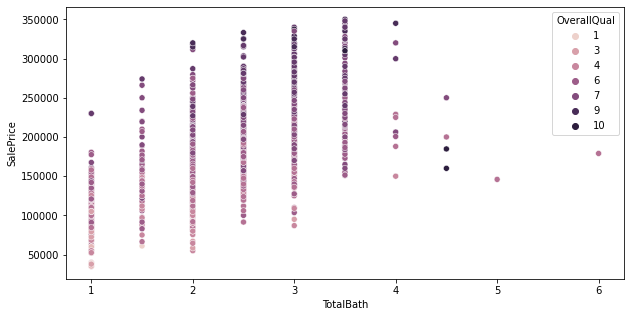

In [316]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='TotalBath', y='SalePrice', hue='OverallQual', data=df_train2)

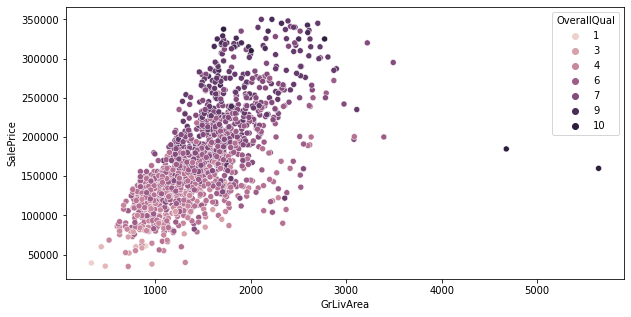

In [317]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='GrLivArea', y='SalePrice', hue='OverallQual', data=df_train2)

In [318]:
# making df with just the quantitative variables I want to use for my model
df_train_features = df_train2[['OverallQual', 'GrLivArea', 'TotalBath']]

In [319]:
df_test_features = df_test[['OverallQual', 'GrLivArea', 'TotalBath']]

#### Assess Categorical Variables

In [320]:
df_train2_cat = df_train2.select_dtypes(include='object')

In [321]:
# still can't figure out why I get this warning even when using .loc
df_train2_cat['SalePrice'] = df_train2.loc[:,'SalePrice']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [322]:
df_train2_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1406 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1406 non-null   object
 1   Street         1406 non-null   object
 2   Alley          1406 non-null   object
 3   LotShape       1406 non-null   object
 4   LandContour    1406 non-null   object
 5   Utilities      1406 non-null   object
 6   LotConfig      1406 non-null   object
 7   LandSlope      1406 non-null   object
 8   Neighborhood   1406 non-null   object
 9   Condition1     1406 non-null   object
 10  Condition2     1406 non-null   object
 11  BldgType       1406 non-null   object
 12  HouseStyle     1406 non-null   object
 13  RoofStyle      1406 non-null   object
 14  RoofMatl       1406 non-null   object
 15  Exterior1st    1406 non-null   object
 16  Exterior2nd    1406 non-null   object
 17  MasVnrType     1406 non-null   object
 18  ExterQual      1406 non-null

In [323]:
pip install dython

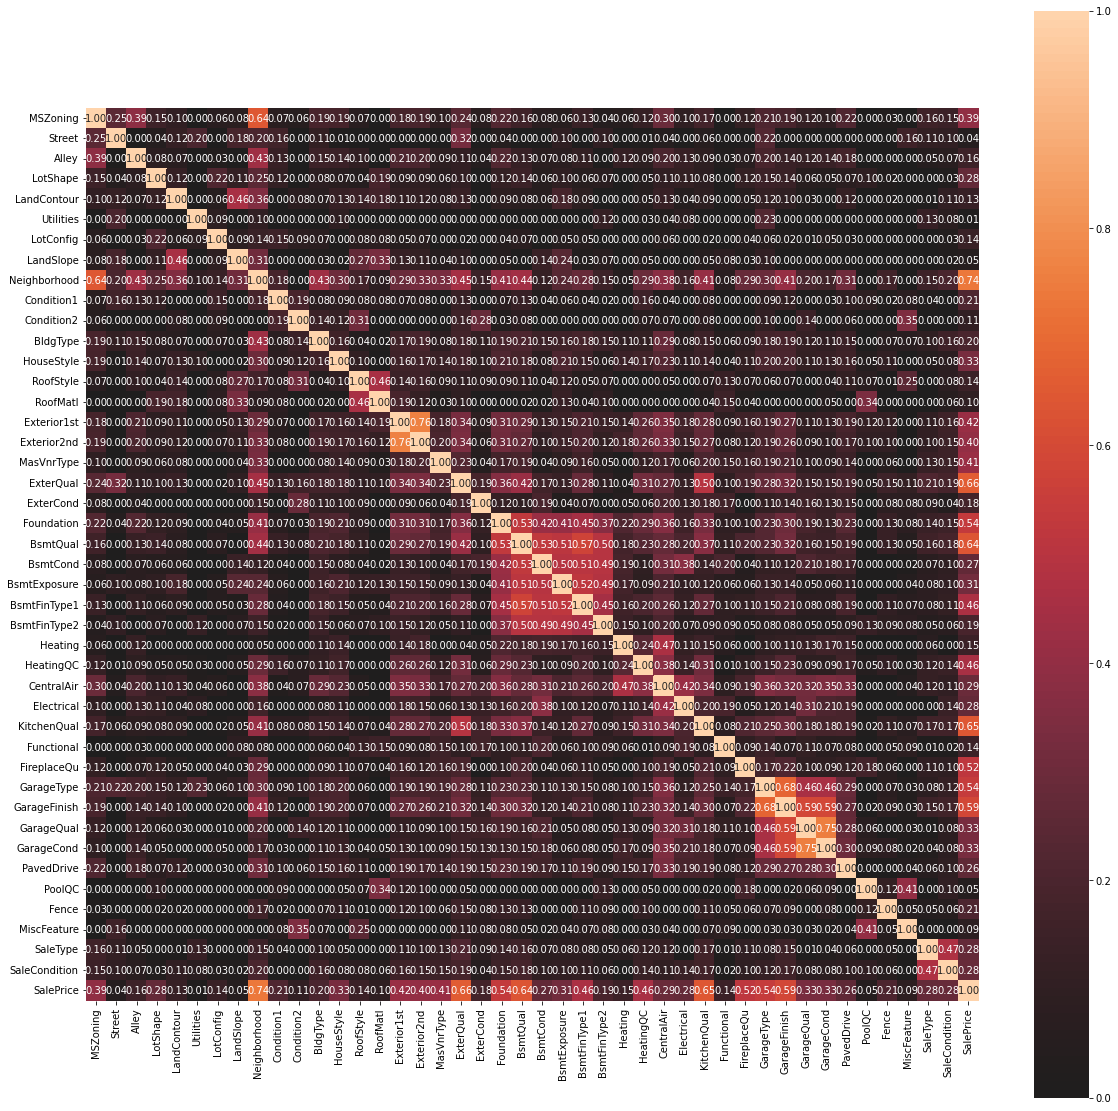

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f414be0aed0>,
 'corr':                MSZoning    Street     Alley  ...  SaleType  SaleCondition  SalePrice
 MSZoning       1.000000  0.249014  0.390464  ...  0.159376       0.145614   0.393303
 Street         0.249014  1.000000  0.000000  ...  0.109514       0.104600   0.044395
 Alley          0.390464  0.000000  1.000000  ...  0.049342       0.069369   0.156227
 LotShape       0.154713  0.041146  0.079783  ...  0.000000       0.027188   0.278998
 LandContour    0.103926  0.117259  0.069888  ...  0.011514       0.107909   0.130651
 Utilities      0.000000  0.201197  0.000000  ...  0.129918       0.075768   0.014860
 LotConfig      0.062523  0.000000  0.034462  ...  0.000000       0.034506   0.137562
 LandSlope      0.075151  0.182923  0.000000  ...  0.000000       0.024160   0.049486
 Neighborhood   0.641332  0.200445  0.430315  ...  0.154885       0.199718   0.736285
 Condition1     0.065694  0.164246  0.127453  ...  0.037595       

In [324]:
from dython.nominal import associations
associations(df_train2_cat, figsize=(20,20))

This correlation between sale price and the categorical variables shows that neighborhood, external quality, and kitchen quality could be considered good predictors.

In [325]:
df_train2_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,0,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal,208500
1,RL,Pave,0,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal,181500
2,RL,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal,223500
3,RL,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,0,0,0,WD,Abnorml,140000
4,RL,Pave,0,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal,250000


In [377]:
for x in df_train2_cat.columns:
  print(x, ':', len(df_train2_cat[x].unique()))

MSZoning : 5
Street : 2
Alley : 3
LotShape : 4
LandContour : 4
Utilities : 2
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 8
BldgType : 5
HouseStyle : 8
RoofStyle : 6
RoofMatl : 8
Exterior1st : 15
Exterior2nd : 16
MasVnrType : 5
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 5
BsmtCond : 5
BsmtExposure : 5
BsmtFinType1 : 7
BsmtFinType2 : 7
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 6
KitchenQual : 4
Functional : 7
FireplaceQu : 6
GarageType : 7
GarageFinish : 4
GarageQual : 6
GarageCond : 6
PavedDrive : 3
PoolQC : 4
Fence : 5
MiscFeature : 5
SaleType : 9
SaleCondition : 6
SalePrice : 610


In [327]:
# need drop_first to run in model
train_dum_df = pd.get_dummies(df_train2_cat[['Neighborhood', 'ExterQual','KitchenQual']], drop_first=True)

In [328]:
train_dum_df.head()

,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [388]:
# combine quantitative variables with qualitative variables
#df_train_features= pd.concat([df_train_features, train_dum_df], axis = 1)

In [389]:
#df_train_features.head()

In [331]:
df_test_cat = df_test.select_dtypes(include='object')

In [393]:
df_test_cat['KitchenQual'].unique()

array(['TA', 'Gd', 'Ex', 'Fa', 0], dtype=object)

In [394]:
df_test_cat['KitchenQual'] = df_test_cat['KitchenQual'].replace([0],'TA')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [395]:
df_test_cat['KitchenQual'].unique()

array(['TA', 'Gd', 'Ex', 'Fa'], dtype=object)

In [396]:
test_dum_df = pd.get_dummies(df_test_cat[['Neighborhood', 'ExterQual','KitchenQual']], drop_first=True)

In [397]:
test_dum_df.head()

,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0


In [398]:
df_test_features= pd.concat([df_test_features, test_dum_df], axis = 1)

In [399]:
df_test_features.head()

,OverallQual,GrLivArea,TotalBath,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,5,896,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,6,1329,1.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,5,1629,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,6,1604,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,8,1280,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0


### Feature Scaling

In [336]:
# Min Max Scaling
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [337]:
scaler = MinMaxScaler()
sale_scaled = scaler.fit_transform(df_train2[['SalePrice']])
sale_scaled

array([[0.55093621],
       [0.46524913],
       [0.59854015],
       ...,
       [0.73500476],
       [0.3402888 ],
       [0.35734687]])

In [338]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [339]:
scaler_2 = StandardScaler()
standard_sale_scaled = scaler_2.fit_transform(df_train2[['SalePrice']])
standard_sale_scaled

array([[ 0.6195948 ],
       [ 0.17215093],
       [ 0.86817473],
       ...,
       [ 1.58077054],
       [-0.48037139],
       [-0.39129692]])

## Modeling

### Linear Regression Model

In [340]:
from sklearn.linear_model import LinearRegression

y = df_train2['SalePrice']
x = df_train2[['OverallQual']]

lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

In [341]:
# another way to do this model 
import statsmodels.api as sm

y = df_train2['SalePrice']
x = df_train2[['OverallQual']]
x = sm.add_constant(x)

lm = sm.OLS(y,x).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     2281.
Date:                Tue, 18 Jan 2022   Prob (F-statistic):          1.66e-296
Time:                        20:59:32   Log-Likelihood:                -16794.
No. Observations:                1406   AIC:                         3.359e+04
Df Residuals:                    1404   BIC:                         3.360e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.956e+04   4725.922    -10.487      0.000   -5.88e+04   -4.03e+04
OverallQual  3.681e+04    770.674     47.763      0.000    3.53e+04    3.83e+04
==============================================================================
Omnibus:                       36.969   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.539
Skew:                           0.229   Prob(JB):                     1.18e-13
Kurtosis:                       3.898   Cond. No.                         29.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [342]:
y_pred = 36810 * x['OverallQual'] - 49560

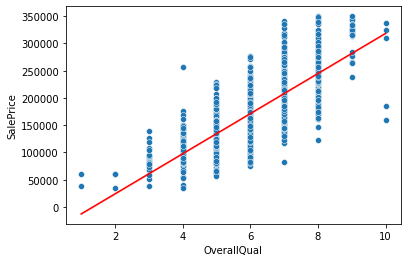

In [343]:
sns.scatterplot(x=x['OverallQual'], y=y)
sns.lineplot(x=x['OverallQual'], y=y_pred, color='red')

### Polynomial Regression

In [344]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

y = df_train2['SalePrice']
x = df_train2[['OverallQual']]

poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(x)

p = linear_model.LinearRegression()
p.fit(x_poly, y)
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(55122.739118791986, array([   0.        ,  442.22444124, 3014.00206132]))

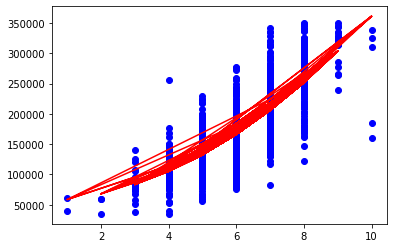

In [345]:
plt.scatter(x, y, color = 'blue')
plt.plot(x, p.predict(x_poly), color='red')

### Piecewise 

In [346]:
pip install pwlf

In [347]:
import pwlf

PWLF = pwlf.PiecewiseLinFit(df_train2['SalePrice'], df_train2['OverallQual'])

z = PWLF.fit(3)
slopes = PWLF.calc_slopes()

xHat = df_train2['SalePrice']  
yHat = PWLF.predict(xHat)

p = PWLF.p_values(method='non-linear', step_size=1e-4)
se = PWLF.se

In [348]:
print(p)
print(se)

[2.44561428e-120 1.81647508e-026 8.55738457e-002 1.38402765e-004
 5.01978624e-018 2.87240022e-090]
[1.35562841e-01 1.67720817e-06 3.29777256e-06 2.95436382e-06
 1.58735711e+04 8.44713222e+03]


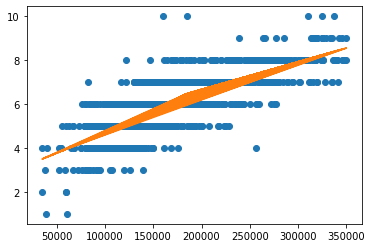

In [349]:
plt.figure()
plt.plot(df_train2['SalePrice'], df_train2['OverallQual'], 'o')
plt.plot(xHat, yHat, '-')
plt.show()

### Multiple Linear Regression Model

In [401]:
y = df_train2['SalePrice']
x2 = df_train_features

lin_reg = LinearRegression()
mul_lin_reg = lin_reg.fit(x2, y)

In [351]:
# look at summary statistics
x2 = sm.add_constant(x2)

mul_lm = sm.OLS(y,x2).fit()
mul_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     186.7
Date:                Tue, 18 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:59:37   Log-Likelihood:                -16275.
No. Observations:                1406   AIC:                         3.262e+04
Df Residuals:                    1372   BIC:                         3.280e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.764e+04   1.15e+04      4.131      0.000     2.5e+04    7.03e+04
OverallQual           1.401e+04    933.164     15.009      0.000    1.22e+04    1.58e+04
GrLivArea               32.6084      2.066     15.783      0.000      28.556      36.661
TotalBath              1.13e+04   1287.775      8.774      0.000    8773.297    1.38e+04
Neighborhood_Blueste -2.442e+04   1.97e+04     -1.243      0.214    -6.3e+04    1.41e+04
Neighborhood_BrDale  -3.819e+04   9369.562     -4.076      0.000   -5.66e+04   -1.98e+04
Neighborhood_BrkSide -6364.3334   7590.160     -0.838      0.402   -2.13e+04    8525.243
Neighborhood_ClearCr  3.045e+04   8298.990      3.669      0.000    1.42e+04    4.67e+04
Neighborhood_CollgCr  8039.1919   6726.234      1.195      0.232   -5155.625    2.12e+04
Neighborhood_Crawfor  2.216e+04   7605.937      2.913      0.004    7236.014    3.71e+04
Neighborhood_Edwards -1.685e+04   7239.921     -2.327      0.020   -3.11e+04   -2646.325
Neighborhood_Gilbert  1514.8741   7124.247      0.213      0.832   -1.25e+04    1.55e+04
Neighborhood_IDOTRR  -2.264e+04   8086.063     -2.800      0.005   -3.85e+04   -6782.462
Neighborhood_MeadowV  -2.73e+04   9342.533     -2.922      0.004   -4.56e+04   -8976.293
Neighborhood_Mitchel  3432.2114   7657.602      0.448      0.654   -1.16e+04    1.85e+04
Neighborhood_NAmes    -204.9144   6938.285     -0.030      0.976   -1.38e+04    1.34e+04
Neighborhood_NPkVill -1.526e+04    1.1e+04     -1.386      0.166   -3.69e+04    6347.074
Neighborhood_NWAmes   4880.8142   7352.844      0.664      0.507   -9543.219    1.93e+04
Neighborhood_NoRidge  4.911e+04   7954.208      6.174      0.000    3.35e+04    6.47e+04
Neighborhood_NridgHt  3.652e+04   7413.892      4.926      0.000     2.2e+04    5.11e+04
Neighborhood_OldTown  -2.33e+04   7193.887     -3.240      0.001   -3.74e+04   -9192.521
Neighborhood_SWISU   -2.213e+04   8622.525     -2.567      0.010    -3.9e+04   -5217.029
Neighborhood_Sawyer   -556.6610   7417.786     -0.075      0.940   -1.51e+04     1.4e+04
Neighborhood_SawyerW  1113.2109   7300.947      0.152      0.879   -1.32e+04    1.54e+04
Neighborhood_Somerst  1.454e+04   6960.896      2.088      0.037     881.457    2.82e+04
Neighborhood_StoneBr  1.758e+04   9143.058      1.923      0.055    -356.473    3.55e+04
Neighborhood_Timber   2.481e+04   7802.173      3.179      0.002    9499.838    4.01e+04
Neighborhood_Veenker  3.326e+04   1.05e+04      3.173      0.002    1.27e+04    5.38e+04
ExterQual_Fa         -1.142e+04   1.01e+04     -1.136      0.256   -3.11e+04    8296.331
ExterQual_Gd         -3517.0378   5996.834     -0.586      0.558   -1.53e+04    8246.918
ExterQual_TA          -1.06e+04   6343.025     -1.671      0.095    -2.3e+04    1842.921
KitchenQual_Fa       -4.047e+04   6238.759     -6.487    

### Ridge Regrssion

In [352]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(x2, y)


Ridge(alpha=1, solver='cholesky')

### Lasso Model

In [353]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x2, y)

Lasso(alpha=0.1)

### Elastic Net Model

In [354]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(x2, y)

ElasticNet(alpha=0.1)

### Decision Tree Model

In [355]:
#from sklearn.tree import DecisionTreeRegressor

#X = df_train2[['OverallQual']]
#y = df_train2['SalePrice']

#tree_reg = DecisionTreeRegressor(max_depth=10, random_state=0)
#tree_reg.fit(X,y)

In [356]:
#from sklearn.metrics import mean_squared_error
#predictions = tree_reg.predict(X)
#mse = mean_squared_error(y,predictions)
#rmse = np.sqrt(mse)
#rmse


In [357]:
#sns.scatterplot(x=df_train2['OverallQual'],y=df_train2['SalePrice'],label='data')
#plt.plot(df_train2['OverallQual'].sort_values(), tree_reg.predict(df_train2['OverallQual'].sort_values().to_frame()),
#         color='red', label='model',
#         linewidth=2)
#plt.legend()


### Random Forest

In [358]:
#from sklearn.ensemble import RandomForestRegressor
#forest_reg = RandomForestRegressor()
#forest_reg.fit(X, y)

In [359]:
#sns.scatterplot(x=df_train2['OverallQual'],y=df_train2['SalePrice'],label='data')
#plt.plot(df_train2['OverallQual'].sort_values(), forest_reg.predict(df_train2['OverallQual'].sort_values().to_frame()),
#         color='red', label='model',
#         linewidth=2)
#plt.legend()

### Cross Validation

In [360]:
from sklearn.model_selection import cross_val_score
def display_scores(scores):
     print("Scores:", scores)
     print("Mean:", scores.mean())
     print("Standard deviation:", scores.std())

In [361]:
# linear regression scores
lin_scores = cross_val_score(lin_reg, x, y,
                              scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [35710.91013047 38533.01599977 40764.05074441 39723.88160059
 41068.80563347 32707.32082215 31848.44152987 36779.49122965
 37964.38172998 36569.79045718]
Mean: 37167.00898775352
Standard deviation: 2966.5661070603524


In [362]:
# multiple linear regression
ml_scores = cross_val_score(lin_reg, x2, y,
                              scoring="neg_mean_squared_error", cv=10)

ml_rmse_scores = np.sqrt(-ml_scores)
display_scores(ml_rmse_scores)

Scores: [23456.1439642  25129.43416193 25502.13931734 30894.84428116
 29540.66277509 21190.41568159 24408.24586682 23340.82967162
 33772.08153608 27604.77524506]
Mean: 26483.957250088737
Standard deviation: 3706.050799107922


In [363]:
# ridge regression
rig_scores = cross_val_score(ridge_reg, x2, y,
                              scoring="neg_mean_squared_error", cv=10)

rig_rmse_scores = np.sqrt(-rig_scores)
display_scores(rig_rmse_scores)

Scores: [23419.43736847 25263.07299654 25341.08966756 30766.8105031
 29581.89695837 21109.55244249 24346.95021411 23441.88562918
 33832.78554606 27533.87381049]
Mean: 26463.73551363576
Standard deviation: 3713.984221495999


In [364]:
# lasso regression
las_scores = cross_val_score(lasso_reg, x2, y,
                              scoring="neg_mean_squared_error", cv=10)

las_rmse_scores = np.sqrt(-las_scores)
display_scores(rig_rmse_scores)

Scores: [23419.43736847 25263.07299654 25341.08966756 30766.8105031
 29581.89695837 21109.55244249 24346.95021411 23441.88562918
 33832.78554606 27533.87381049]
Mean: 26463.73551363576
Standard deviation: 3713.984221495999


In [365]:
# elastic net
enet_scores = cross_val_score(elastic_net, x2, y,
                              scoring="neg_mean_squared_error", cv=10)

enet_rmse_scores = np.sqrt(-enet_scores)
display_scores(enet_rmse_scores)

Scores: [25319.77713268 29152.47722983 25573.53436438 32112.2908915
 31645.203075   22389.26133779 25145.75387211 26746.09320808
 36461.96295061 28175.47676414]
Mean: 28272.18308261291
Standard deviation: 3958.4358022281135


In [366]:
# Decision Tree Scores
#scores = cross_val_score(tree_reg, X, y,
#                         scoring="neg_mean_squared_error", cv=10)
#tree_rmse_scores = np.sqrt(-scores)
#display_scores(tree_rmse_scores)

In [367]:
# Random Forest Scores
#forest_scores = cross_val_score(forest_reg, X, y,
#                              scoring="neg_mean_squared_error", cv=10)
#forest_rmse_scores = np.sqrt(-forest_scores)
#display_scores(forest_rmse_scores)

## Generate Submission

In [374]:
df_test_features.columns

Index(['OverallQual', 'GrLivArea', 'TotalBath', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'ExterQual_Fa',
       'ExterQual_Gd', 'ExterQual_TA', 'KitchenQual_Ex', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA'],
      dtype='object')

In [375]:
df_train_features.columns

Index(['OverallQual', 'GrLivArea', 'TotalBath', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'ExterQual_Fa',
       'ExterQual_Gd', 'ExterQual_TA', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA'],
      dtype='object')

In [402]:
test_preds = mul_lin_reg.predict(x2)

In [ ]:
#output = pd.DataFrame({'Id': df_test.Id,
#                       'SalePrice': test_preds})
#output.to_csv('submission2.csv', index=False)

In [ ]:
#from google.colab import files
#files.download('submission2.csv')

## Conclusions

The multiple linear regression model submitted above shows that it is fairly capable of predicting sale price based off of the features selected. The R-squared value is 0.797 which states that it was able to account for 79.7% of the variance in the data. As we want this number to be as close to 1 as possible, it shows that there could still be some improvement in the predictions. When comparing the cross validation between a basic linear regression and the multiple linear regression, it shows that on average the multiple linear regression has lower error but a higher standard deviation. This is showing that this model has some lack of fit to the data. In the end, even though this model is showing a decent prediction, it could use some further modification in order to better predict sale price. 

Professor Gift, I have updated my model so now the values are different than what I submitted for the assignment 2 deadline. 